# Trabajo Final. Análisis de Datos

## Alumnos:

### Domenje, Carlos R.

### Fux, Santiago.

---

## DATASET: Uso de Taxis Yellow Cab en USA en el año 2020

**Problema.** Responderemos a la siguiente pregunta

1. ¿Existe una manera de caracterizar los lugares más recurrentes para inicio / fin de viaje?


## 1. Obtención de datos

Para importar los datos, buscamos en la página web brindada por la cátedra:

- [Yellow Cab - Dataset](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page)

**Nota**: El dataset utilizado será el del año 2020, los tres primeros meses (Enero, Febrero, Marzo) y será descargado en una carpeta llamada "data" dentro de la carpeta contenedora del proyecto.

In [1]:
# Path del dataset a utilizar.
DATASET_PATH = r'./data'

In [2]:
# listamos los archivos que se encuentran en el path
!ls {DATASET_PATH}

yellow_tripdata_2020-01.parquet  yellow_tripdata_2020-03.parquet
yellow_tripdata_2020-02.parquet


In [1]:
# Importamos las librerias necesarias para interactuar con el dataset.

import pandas as pd
import glob
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
import scipy.stats as stats
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score,plot_confusion_matrix,roc_auc_score, classification_report, confusion_matrix, precision_recall_curve, auc
from sklearn.preprocessing import StandardScaler
from collections import Counter
# Set decimals format with 3 decimals
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
# El archivo del dataset tiene como formato .parquet, el cual es un archivo que esta orientado a columnas. 
all_files = glob.glob("./data/*.parquet")

df_list = []

for filename in all_files:
    # Se carga el archivo
    df = pd.read_parquet(filename)
    # Tomo el 10% del dataset total   
    df = df.sample(frac=0.1)
    # Agrego a la lista
    df_list.append(df)


df = pd.concat(df_list, axis=0, ignore_index=True)


df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,1571207.000,1555918.000,1571207.000,1555918.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1555918.000
mean,1.673,1.501,2.872,1.056,164.419,162.182,1.252,12.629,1.105,0.492,2.193,0.332,0.298,18.574,2.297
std,0.470,1.143,4.137,0.774,65.791,70.036,0.485,11.779,1.252,0.072,2.755,1.607,0.034,14.368,0.706
min,1.000,0.000,-30.620,1.000,1.000,1.000,0.000,-500.000,-4.500,-0.500,-493.220,-35.740,-0.300,-502.020,-2.500
25%,1.000,1.000,0.970,1.000,125.000,113.000,1.000,6.500,0.000,0.500,0.000,0.000,0.300,11.160,2.500
50%,2.000,1.000,1.600,1.000,162.000,162.000,1.000,9.000,0.500,0.500,1.950,0.000,0.300,14.300,2.500
75%,2.000,2.000,2.940,1.000,234.000,234.000,2.000,14.000,2.500,0.500,2.860,0.000,0.300,19.900,2.500
max,6.000,9.000,2193.720,99.000,265.000,265.000,4.000,1238.000,18.500,3.300,800.000,266.680,0.300,1242.300,2.750


In [4]:
## Para obtener una descripción del tipo de datos que contiene cada columna, utilizamos la funcion info()
# Podemos además, obtener una idea general de cuantos datos no nulos contiene.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1571207 entries, 0 to 1571206
Data columns (total 19 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   VendorID               1571207 non-null  int64         
 1   tpep_pickup_datetime   1571207 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  1571207 non-null  datetime64[ns]
 3   passenger_count        1555918 non-null  float64       
 4   trip_distance          1571207 non-null  float64       
 5   RatecodeID             1555918 non-null  float64       
 6   store_and_fwd_flag     1555918 non-null  object        
 7   PULocationID           1571207 non-null  int64         
 8   DOLocationID           1571207 non-null  int64         
 9   payment_type           1571207 non-null  int64         
 10  fare_amount            1571207 non-null  float64       
 11  extra                  1571207 non-null  float64       
 12  mta_tax                15712

In [5]:
# La función describe() nos da una vista general de valores de cantidades de datos, media, desv. standard, valores min y max de cada columna.
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,1571207.000,1555918.000,1571207.000,1555918.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1571207.000,1555918.000
mean,1.673,1.501,2.872,1.056,164.419,162.182,1.252,12.629,1.105,0.492,2.193,0.332,0.298,18.574,2.297
std,0.470,1.143,4.137,0.774,65.791,70.036,0.485,11.779,1.252,0.072,2.755,1.607,0.034,14.368,0.706
min,1.000,0.000,-30.620,1.000,1.000,1.000,0.000,-500.000,-4.500,-0.500,-493.220,-35.740,-0.300,-502.020,-2.500
25%,1.000,1.000,0.970,1.000,125.000,113.000,1.000,6.500,0.000,0.500,0.000,0.000,0.300,11.160,2.500
50%,2.000,1.000,1.600,1.000,162.000,162.000,1.000,9.000,0.500,0.500,1.950,0.000,0.300,14.300,2.500
75%,2.000,2.000,2.940,1.000,234.000,234.000,2.000,14.000,2.500,0.500,2.860,0.000,0.300,19.900,2.500
max,6.000,9.000,2193.720,99.000,265.000,265.000,4.000,1238.000,18.500,3.300,800.000,266.680,0.300,1242.300,2.750


### Descripción de Columnas del Dataset.


In [6]:
# Listado de tipos de variables presentes en el dataset
df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                      object
dtype: object

In [7]:
# funcion para plotear las distribuciones de los atributos
def display_dataset_distributions(dataset):
    fig = dataset.hist(xlabelsize=10, ylabelsize=10,figsize=(18,18))
    [x.title.set_size(14) for x in fig.ravel()]
    plt.tight_layout
    plt.show()
    

# funcion para imprimir nulos
def print_null_info(col):
    print(f'Cantidad de nulos: {col.isnull().sum()}/{col.size}')

# funcion para imprimir datos de v. categoricas
def print_categorical(col):
    print(f'Ordinalidad: {col.unique()}')
    print_null_info(col)
    print('Ocurrencias:')
    print(col.value_counts().sort_values())

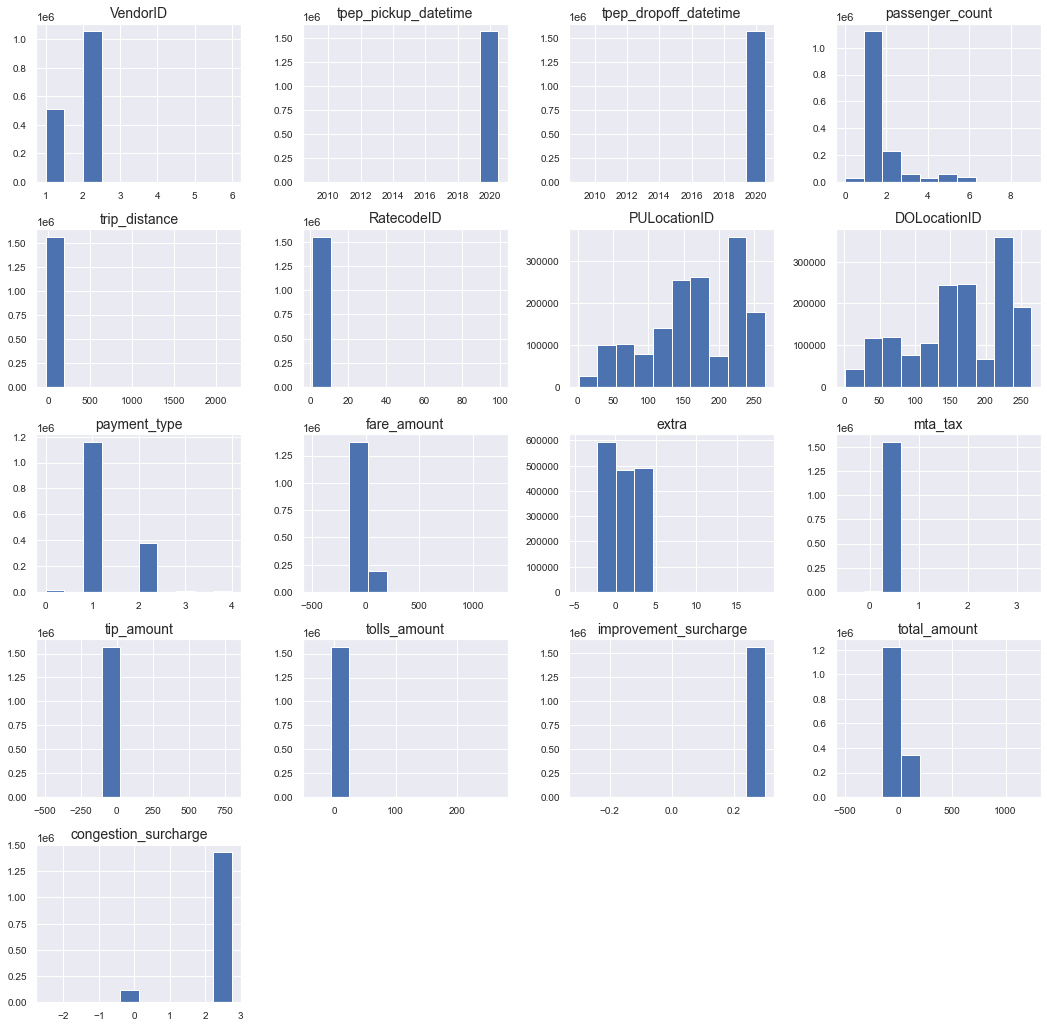

In [8]:
#imprimo distribuciones 
display_dataset_distributions(df)


- **VendorID**: Proveedor de servicios de tecnologias en taxis (T-PEP)
    - Tipo de dato: Categórica ordinal  
    - Tipo de variable: Entrada  


In [9]:
print_categorical(df.VendorID)

Ordinalidad: [2 1 6 5]
Cantidad de nulos: 0/1571207
Ocurrencias:
5          4
6         66
1     513830
2    1057307
Name: VendorID, dtype: int64



- **tpep_pickup_datetime**: Fecha y hora en el cual el reloj fue activado al iniciar un viaje.
    - Tipo de dato: Timestamp compuesto  
    - Tipo de variable: Entrada  

    - Ejemplo del dato en el dataset: 2020-07-01 00:25:32


In [10]:
print_null_info(df.tpep_pickup_datetime)

Cantidad de nulos: 0/1571207


- **tpep_dropoff_datetime**: Fecha y hora en el cual el reloj fue desactivador al finalizar un viaje.
    - Tipo de dato: Timestamp compuesto
    - Tipo de variable: Entrada  / Salida

    - Ejemplo del dato en el dataset: 2020-07-01 00:33:39


In [11]:
print_null_info(df.tpep_dropoff_datetime)

Cantidad de nulos: 0/1571207


- **passenger_count**: El número de pasajeros en el vehiculo. (Es un dato que lo ingresa el conductor.)
    - Tipo de dato: Numérico 
    - Tipo de variable: Entrada
    - Ejemplo del dato en el dataset: 1.0

In [12]:
print_null_info(df.passenger_count)

Cantidad de nulos: 15289/1571207



- **trip_distance**: La distancia del viaje transcurrido en millas reportada por el taxímetro. 
    - Tipo de dato: Numérico 
    - Tipo de variable: Entrada  

    - Ejemplo del dato en el dataset: 1.50


In [13]:
print_null_info(df.trip_distance)

Cantidad de nulos: 0/1571207


- **PULocationID**: TLC Zona en la que el taxímetro se activó.
    - Tipo de dato: Categórica ordinal
    - Tipo de variable: Entrada / Salida

    - Ejemplo del dato en el dataset: 238


In [14]:
print_categorical(df.PULocationID)

Ordinalidad: [236 161 239 113  68 231 141 146 238 132 164 237 230 163 229 142 162 246
 234 114 262 233  13  87 138  43 170 186 158 249  48 140  79 151 179  75
 166 264  74  90 144 107 263 148   4  42  88  50  97  45   7 100 145 261
 224  89 125  17 242 209 211 244 143  36 137  14  24 167  33 181  66  25
 122 226  41 188  82 208   1  10 152 116 232  63  62  18 240 256 225 177
  65 193 189  91  61 129  12  69 173  40 254  72  85  76  49  95 168  28
  35  51  54 160 260 243 112  52 127 247 101 218 136  86 108 205 106 255
  39  37 223 235  15 133 220 216 135 265 171 155 202  71  83 228  16 198
  26 191 130 185 195  93 219 258  70 210  64  56 227 217 213 196 157 131
  29 248 139 149  81 159 215 134 124 207 178 197 182  38 259  80 174 201
 153 121 203 222 147  77 190 165 119 120 180  21 194  78 123  94 117 169
  20 126   8  92  22  98 102 257 250  47 212 150  67   3  19 214 199 241
  44 200  55  53  11 192  32  30  73 183   9 253 118 128  60 206 175 252
   5  59  46  58 156  34 245 251  96 2


- **DOLocationID**: TLC Zona en la que el taxímetro se desactivó.
    - Tipo de dato: Categórica ordinal
    - Tipo de variable: Entrada / Salida 

    - Ejemplo del dato en el dataset: 75


In [15]:
print_categorical(df.DOLocationID)

Ordinalidad: [161 164 142 162 231 237 146 238  95 170  41 263 100  48 141 262 163 230
 239 249  79   7 242 233 114 211 138 166 181 234 132 140  87 151  25  89
 236 260 143 137 264 148 113 209 229 112  80  82  93  74  75  90 107  13
 226  24   4  33  68 232  56 144  50  12 246 174 158  42 153  55  40 145
  43 115 189 196  10 186  66 188 224  36 255 217 119 216 160 218  37  97
  88 244 169  53  39  61 136 129 125 228 173  62 223 134  28 197  52 261
  38 171 102 243  94  45  17   1  65 116 265  83 127  85 225 256 168 257
  49  18 258 179 159  72 130 135  81 205  69 193 165   9  70  29 152 213
 198 247 167  60 133  47 254 187 117  35 202 185  14  77 192 200  51  76
 215 194 248 201  73 250 157  63 219 227 235  22  23  84 208  91 172 156
 203 241  92 195 124 210 126 155 106  71 177  32 190 220  26 191 108 252
 122 183  19 182  16 123  11  54   8  67  15  20 121  98 259 120  86  64
  78 178 139 128 149   3 212 240  31 206  34 147 180 150  21  46 111 101
 131 175 214 221 222 253 251  57 207 1


- **RatecodeID**:  El código de tarifa final vigente al final del viaje.
    - Tipo de dato: Categórica ordinal
    - Tipo de variable: Entrada  

    - 1= Standard rate
    - 2= JFK 
    - 3= Newark
    - 4= Nassau or Westchester
    - 5= Negotiated fare
    - 6= Group ride


In [16]:
print_categorical(df.RatecodeID)

Ordinalidad: [ 1.  2. nan  5.  3. 99.  4.  6.]
Cantidad de nulos: 15289/1571207
Ocurrencias:
6.000          10
99.000         77
4.000        1197
3.000        3194
5.000        8637
2.000       35721
1.000     1507082
Name: RatecodeID, dtype: int64


- **store_and_fwd_flag**:  Este flag indica si el registro de viaje se llevó a cabo en la memoria del dispositivo del vehiculo antes de enviar al proveedor, también conocido como "almacenar y reenviar", porque el vehiculo no tenia conexion al servidor.
    - Tipo de dato: Categórica  
    - Tipo de variable: Entrada  

    - Y= Almacenar y reenviar informacion.
    - N= No almacenar y enviar informacion.


In [17]:
print_categorical(df.store_and_fwd_flag)

Ordinalidad: ['N' 'Y' None]
Cantidad de nulos: 15289/1571207
Ocurrencias:
Y      16048
N    1539870
Name: store_and_fwd_flag, dtype: int64



- **payment_type**: Un código numérico que significa cómo el pasajero pagó por el viaje.
    - Tipo de dato: Categórica ordinal  
    - Tipo de variable: Entrada  

    - 1= Credit card
    - 2= Cash
    - 3= No charge
    - 4= Dispute
    - 5= Unknown
    - 6= Voided trip


In [18]:
print_categorical(df.payment_type)

Ordinalidad: [1 2 3 0 4]
Cantidad de nulos: 0/1571207
Ocurrencias:
4       4533
3       7979
0      15289
2     381901
1    1161505
Name: payment_type, dtype: int64


- **fare_amount**: La tarifa de tiempo y distancia calculada por el taxímetro.
    - Tipo de dato: Numérico  
    - Tipo de variable: Salida  

    - Ejemplo del dato en el dataset: 8.0


In [19]:
print_null_info(df.fare_amount)

Cantidad de nulos: 0/1571207


- **Extra**: Varios extras y recargos. Actualmente, esto solo incluye los cargos de $0.50 y $1 por la hora pico y por la noche.
    - Tipo de dato: Numérico  
    - Tipo de variable: Salida  

    - Ejemplo del dato en el dataset: 0.5


In [20]:
print_null_info(df.extra)

Cantidad de nulos: 0/1571207



- **mta_tax**: Impuesto MTA de $0.50 que se activa automáticamente según la tasa de uso del medidor.
    - Tipo de dato: Numérico
    - Tipo de variable: Salida  

    - Ejemplo del dato en el dataset: 0.5


In [21]:
print_null_info(df.mta_tax)

Cantidad de nulos: 0/1571207


- **improvement_surcharge**: Recargo de mejora de $ 0.30 en viaje en el descenso de bandera. El recargo por mejora comenzó a cobrarse en 2015.
    - Tipo de dato: Numérico  
    - Tipo de variable: Salida  

    - Ejemplo del dato en el dataset: 0.3


In [22]:
print_null_info(df.improvement_surcharge)

Cantidad de nulos: 0/1571207


- **tip_amount**: Importe de la propina: este campo se completa automáticamente para las propinas de tarjetas de crédito. Las propinas en efectivo no están incluidas.
    - Tipo de dato: Numérico
    - Tipo de variable: Salida  

    - Ejemplo del dato en el dataset: 0.00  


In [23]:
print_null_info(df.tip_amount)

Cantidad de nulos: 0/1571207


- **tolls_amount**: Importe total de todos los peajes pagados en el viaje.
    - Tipo de dato: Numérico
    - Tipo de variable: Salida  
    - Ejemplo del dato en el dataset: 0.00


In [24]:
print_null_info(df.tolls_amount)

Cantidad de nulos: 0/1571207



- **total_amount**: El monto total cobrado a los pasajeros. No incluye propinas en efectivo.
    - Tipo de dato: Numérico  
    - Tipo de variable: Salida  
    - Ejemplo del dato en el dataset: 9.30


In [25]:
print_null_info(df.total_amount)

Cantidad de nulos: 0/1571207


- **congestion_surcharge**: Importe total recaudado en el viaje por el recargo por congestión del Estado de Nueva York.
    - Tipo de dato: Numérico
    - Tipo de variable: Salida  
    - Ejemplo del dato en el dataset: 0.00


In [26]:
print_null_info(df.congestion_surcharge)

Cantidad de nulos: 15289/1571207


- **airport_fee**: $1.25 para recoger solo en los aeropuertos LaGuardia y John F. Kennedy
    - Tipo de dato: Numérico  
    - Tipo de variable: Salida
    - Ejemplo del dato en el dataset: None

In [27]:
print_null_info(df.airport_fee)

Cantidad de nulos: 1571207/1571207


## 2. Limpieza de los datos


### 2.1 Datos faltantes

In [28]:
# verificamos cantidad de items repetidos y los eliminamos
df = df.drop_duplicates()
df.describe() #TODO: Agrego describe para que se noten las cantidades eliminadas

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,1571084.000,1555918.000,1571084.000,1555918.000,1571084.000,1571084.000,1571084.000,1571084.000,1571084.000,1571084.000,1571084.000,1571084.000,1571084.000,1571084.000,1555918.000
mean,1.673,1.501,2.872,1.056,164.421,162.183,1.252,12.627,1.105,0.493,2.193,0.332,0.298,18.573,2.297
std,0.470,1.143,4.137,0.774,65.789,70.036,0.485,11.777,1.252,0.072,2.755,1.607,0.034,14.367,0.706
min,1.000,0.000,-30.620,1.000,1.000,1.000,0.000,-500.000,-4.500,-0.500,-493.220,-35.740,-0.300,-502.020,-2.500
25%,1.000,1.000,0.970,1.000,125.000,113.000,1.000,6.500,0.000,0.500,0.000,0.000,0.300,11.160,2.500
50%,2.000,1.000,1.600,1.000,162.000,162.000,1.000,9.000,0.500,0.500,1.950,0.000,0.300,14.300,2.500
75%,2.000,2.000,2.940,1.000,234.000,234.000,2.000,14.000,2.500,0.500,2.860,0.000,0.300,19.900,2.500
max,6.000,9.000,2193.720,99.000,265.000,265.000,4.000,1238.000,18.500,3.300,800.000,266.680,0.300,1242.300,2.750


In [29]:
# verificamos cantidad de nulos en cada categoría
for i in range(len(df.columns)):
  col_name = df.columns[i]
  col_data = df[col_name]
  print(f'{col_name}: {col_data.isnull().sum()}/{col_data.size}')

VendorID: 0/1571084
tpep_pickup_datetime: 0/1571084
tpep_dropoff_datetime: 0/1571084
passenger_count: 15166/1571084
trip_distance: 0/1571084
RatecodeID: 15166/1571084
store_and_fwd_flag: 15166/1571084
PULocationID: 0/1571084
DOLocationID: 0/1571084
payment_type: 0/1571084
fare_amount: 0/1571084
extra: 0/1571084
mta_tax: 0/1571084
tip_amount: 0/1571084
tolls_amount: 0/1571084
improvement_surcharge: 0/1571084
total_amount: 0/1571084
congestion_surcharge: 15166/1571084
airport_fee: 1571084/1571084


#### 2.1.1 Análisis de faltantes

Las categorías con faltantes son las siguientes:

* passenger_count: 15180/1571072
* RatecodeID: 15180/1571072
* store_and_fwd_flag: 15180/1571072
* congestion_surcharge: 15180/1571072
* airport_fee: 1571072/1571072

Para cada una de estas columnas se decide:
* __passenger_count__ es ingresado a mano por lo que los datos faltantes suponemos que corresponden a fallas en la carga por parte del conductor. Se decide eliminar los faltantes dado que representan el 1%
* __RatecodeID__ no aporta información por lo que se elimina esta feature
* __store_and_fwd_flag__ no aporta información por lo que se elimina esta feature
* __congestion_surcharge__ : los faltantes representan el 1% por lo que se quitan
* __airport_fee__ se quita ya que todos los valores son nulos


In [30]:
# descarto datos nulos de los features con interés (passenger count y congestion_surcharge)
df = df.dropna(subset=['passenger_count', 'congestion_surcharge'])
len(df['passenger_count'])

1555918

#### 2.1.2 Datos no nulos inválidos

En algunos features se detectan valores fuera del rango esperado (tal como valores negativos o fuera del rango de las categorías definidas)

In [31]:
# verificamos cantidad de negativos en las categorías numéricas
cols_to_check = ['trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge']

for i, col in enumerate(cols_to_check):
  col_data = df[col]
  print(f'{col}: {col_data[col_data < 0].count()}/{col_data.size}')
  

trip_distance: 2/1555918
fare_amount: 4838/1555918
extra: 2306/1555918
mta_tax: 4757/1555918
tip_amount: 52/1555918
tolls_amount: 113/1555918
improvement_surcharge: 4838/1555918
total_amount: 4838/1555918
congestion_surcharge: 3871/1555918


In [32]:
# Funcion para realizar subplots de variables

def plotVariables(dataframe, varArray):
    fig = plt.figure(figsize=(30,15))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    for j,colName in enumerate(varArray):
        plt.subplot(3,3,j+1)
        plt.plot(dataframe[colName])
        plt.title(colName)
        

#### Exploración gráfica de variables con datos negativos

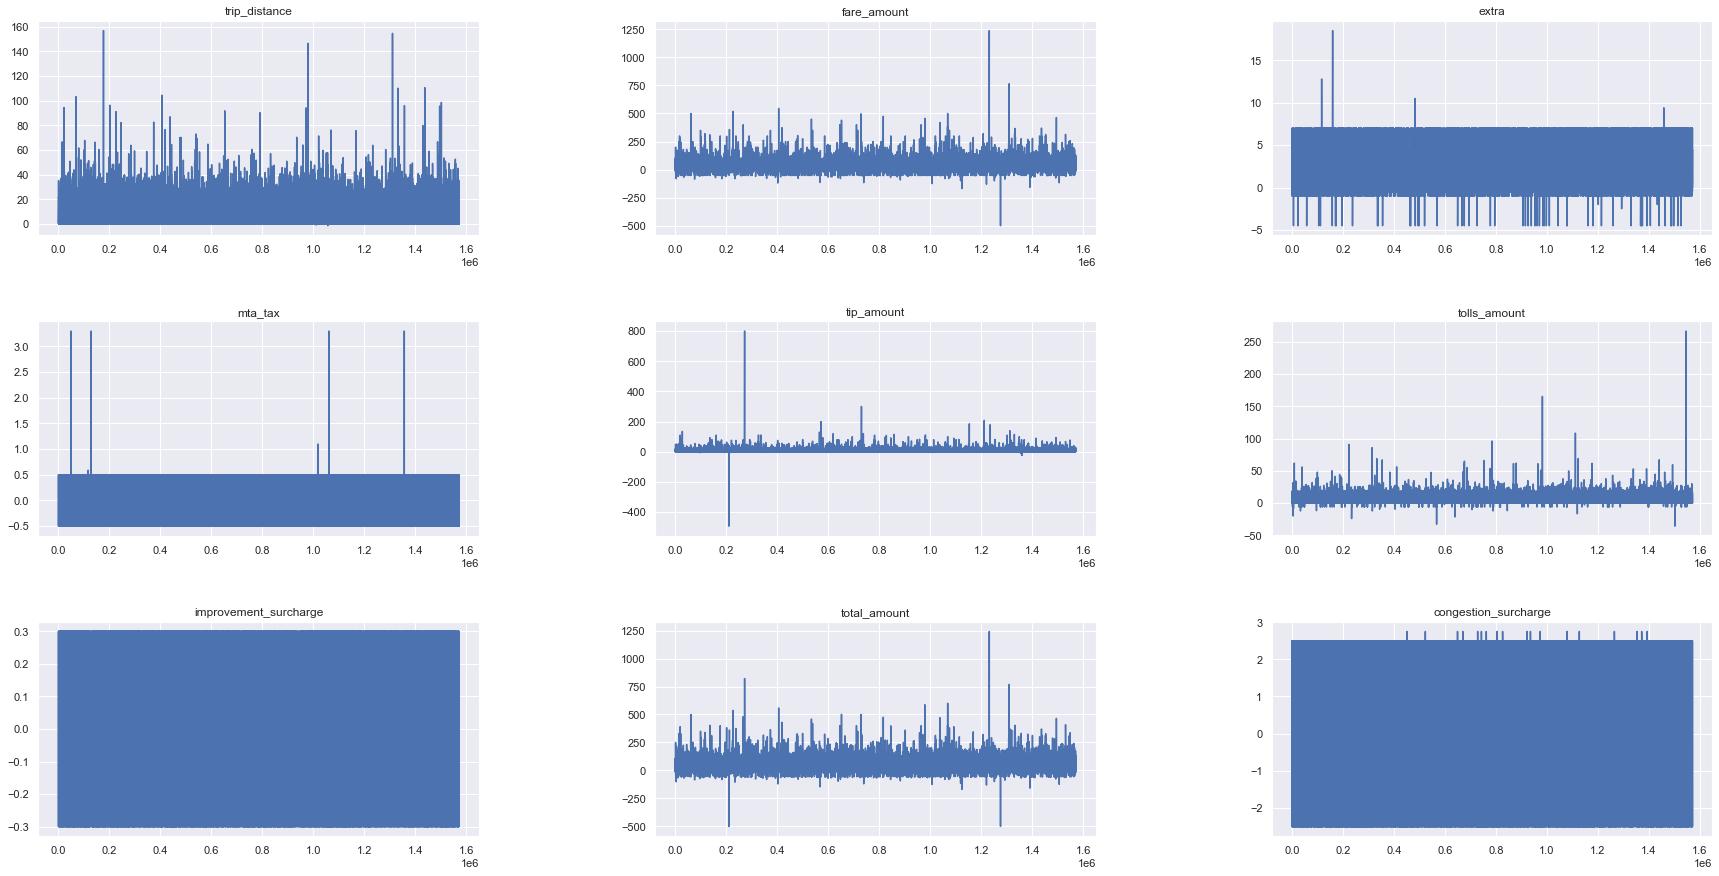

In [33]:
 #TODO: Agrego graficos para mostrar estos datos anomalos.
# Exploración gráfica de variables con datos negativos.

colArrays = ['trip_distance', 'fare_amount', 'extra', 'mta_tax', 
            'tip_amount', 'tolls_amount', 'improvement_surcharge', 
            'total_amount', 'congestion_surcharge']

plotVariables(df,colArrays)


In [34]:
# trip distance: borro <= 0
df = df[(df['trip_distance'] > 0)]
# fare_amount: borro < 0
df = df[(df['fare_amount'] >= 0)]
# extra: borro < 0
df = df[(df['extra'] >= 0)]
# mta_tax: borro < 0
df = df[(df['mta_tax'] >= 0)]
# tip_amount: borro < 0
df = df[(df['tip_amount'] >= 0)]
#tolls amount: borro < 0
df = df[(df['tolls_amount'] >= 0)]
#improvement_surcharge: borro < 0
df = df[(df['improvement_surcharge'] >= 0)]
#total_amount: borro < 0
df = df[(df['total_amount'] >= 0)]
#congestion_surcharge: borro < 0
df = df[(df['congestion_surcharge'] >= 0)]

len(df)



1535699

#### Exploración gráfica de datos filtrados


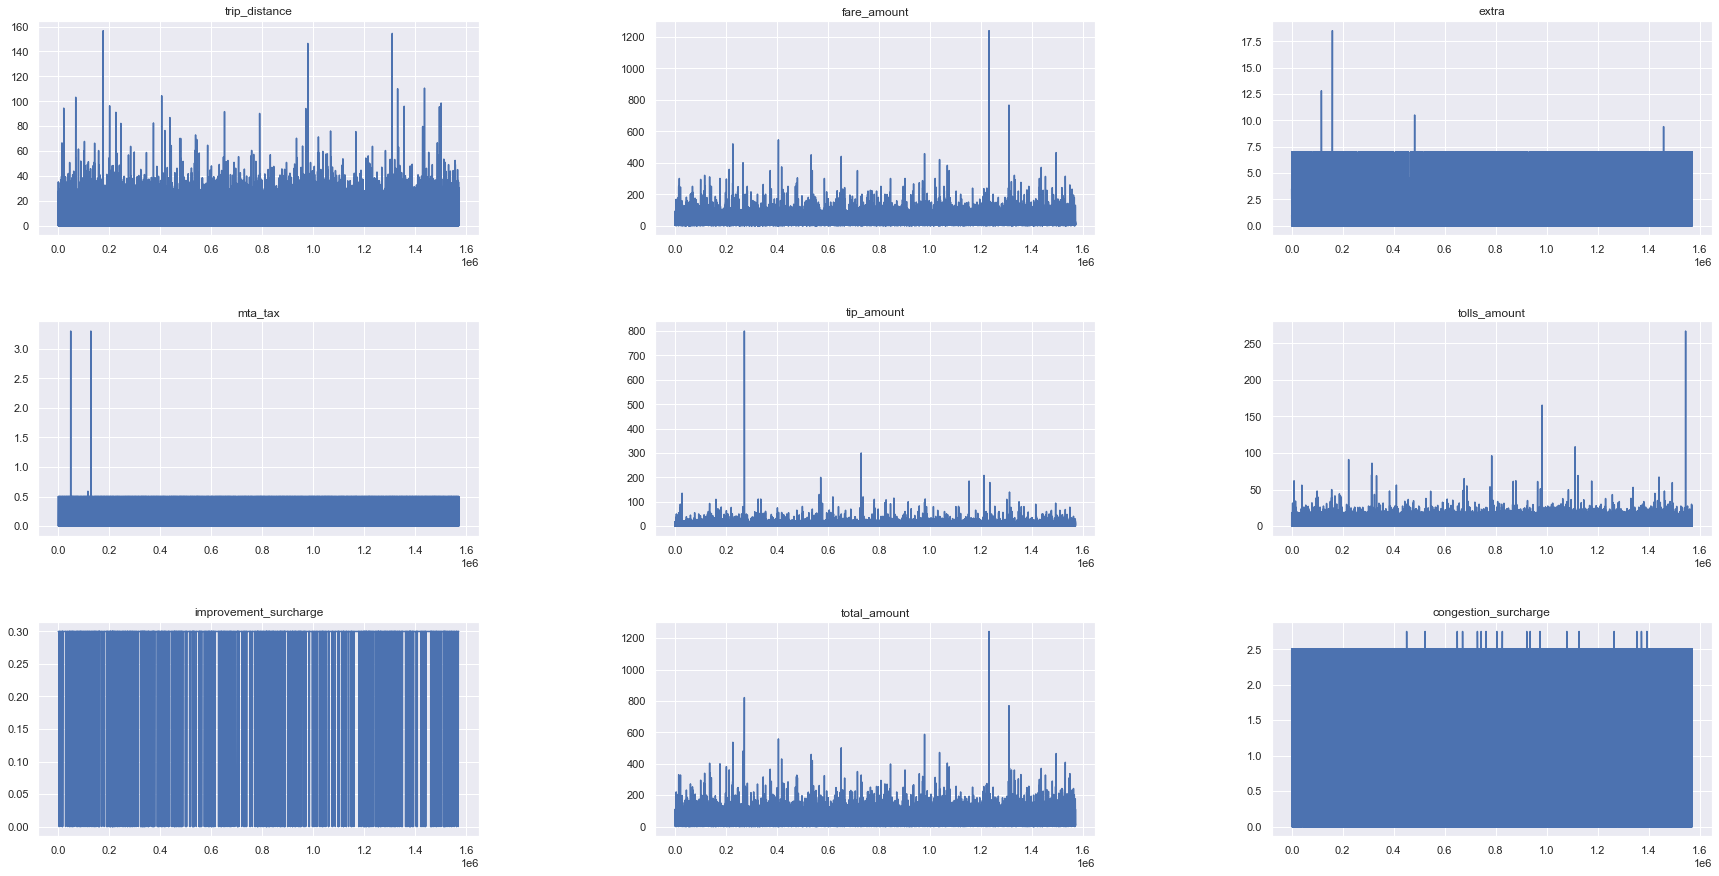

In [35]:
# Datos sin valores negativos
plotVariables(df,colArrays)

#### 2.1.3 Filtro entradas por tipo de pago
Descarto otros pagos diferenes de CREDIT (payment_type = 1)

In [36]:
df = df[df["payment_type"] == 1]
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,1151686.000,1151686.000,1151686.000,1151686.000,1151686.000,1151686.000,1151686.000,1151686.000,1151686.000,1151686.000,1151686.000,1151686.000,1151686.000,1151686.000,1151686.000
mean,1.671,1.495,2.872,1.040,166.137,163.901,1.000,12.474,1.130,0.498,2.950,0.342,0.300,19.293,2.379
std,0.470,1.142,3.686,0.308,65.209,69.376,0.000,10.942,1.253,0.031,2.707,1.594,0.003,14.039,0.537
min,1.000,0.000,0.010,1.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,1.000,1.000,1.000,1.000,132.000,113.000,1.000,6.500,0.000,0.500,1.750,0.000,0.300,11.800,2.500
50%,2.000,1.000,1.660,1.000,162.000,162.000,1.000,9.000,0.500,0.500,2.320,0.000,0.300,14.900,2.500
75%,2.000,2.000,2.910,1.000,234.000,234.000,1.000,13.500,2.500,0.500,3.260,0.000,0.300,20.380,2.500
max,2.000,9.000,156.670,99.000,265.000,265.000,1.000,545.000,18.500,3.300,800.000,86.050,0.300,821.300,2.750


### 2.2 Ingeniería de datos

#### 2.2.1 Features de tiempo y hora del día

In [37]:
# generamos una nueva columna "duration" con el tiempo de viaje
ts_init = pd.to_datetime(df['tpep_pickup_datetime']).values.astype(np.int64) / 1000000000
ts_end = pd.to_datetime(df['tpep_dropoff_datetime']).values.astype(np.int64) / 1000000000
duration = ts_end - ts_init
df['duration'] = duration

# ademas creamos 3 categorías para el horario en que se inició el viaje: diurno, vespertino y nocturno
MORNING_START = 6
MORNING_END = 13
AFTERNOON_START = 14
AFTERNOON_END = 20
EVENING_START = 21
EVENING_END = 5 

day_interval = df['tpep_pickup_datetime'].dt.hour
df['morning'] = pd.cut(day_interval, bins=[-float('Inf'), MORNING_START - 1, MORNING_END, float('Inf')], labels=[0, 1, 0], ordered=False)
df['afternoon'] = pd.cut(day_interval, bins=[-float('Inf'), AFTERNOON_START - 1, AFTERNOON_END, float('Inf')], labels=[0, 1, 0], ordered=False)
df['evening'] = pd.cut(day_interval, bins=[-float('Inf'), 0, EVENING_END, EVENING_START, 23, float('Inf')], labels=[0, 1, 0, 1, 0], ordered=False)

# reviso que sean validas 
df['morning'].values.isnull().sum(), df['afternoon'].values.isnull().sum(), df['evening'].values.isnull().sum()

(0, 0, 0)

In [38]:
# termino de borrar todos los negativos
df['morning'].values.isnull().sum(), df['afternoon'].values.isnull().sum(), df['evening'].values.isnull().sum()

# verifico si tengo entradas con duration < 0
duration_invalid = df[df['duration'] < 0]['duration'].count()
print(f'Duraciones inválidas: {duration_invalid}')

Duraciones inválidas: 0


In [39]:
# Se eliminan las duraciones invalidas
df = df[(df['duration'] >= 0)]

#### 2.2.2 Codificación del origen y destino

[(237, 52806), (161, 51683), (236, 51153), (162, 44573), (186, 39577), (230, 38881), (234, 37708), (170, 36529), (142, 35478), (48, 33042)]
[(0, 730256), (237, 52806), (161, 51683), (236, 51153), (162, 44573), (186, 39577), (230, 38881), (234, 37708), (170, 36529), (142, 35478), (48, 33042)]


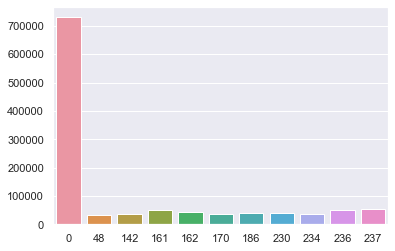

In [40]:
# definimos el umbral mínimo de cantidad de viajes para podar las categorías PULocationID y DOLocationID.
# location_id_min_th_count = 0.01
# total_items = len(df['PULocationID'])

# # convertimos PULocationID usando frequency encoding y me quedo con los que representan al menos 1%
# pulocation_id_freq_map = (df['PULocationID'].value_counts(sort=True) / total_items).to_dict()
# df['PULocationIDFreq'] = df['PULocationID'].apply(lambda x: pulocation_id_freq_map[x])
# # # convertimos DOLocationID
# # dolocation_id_freq_map = (df['DOLocationID'].value_counts(sort=True) / total_items).to_dict()
# # df['DOLocationIDFreq'] = df['DOLocationID'].apply(lambda x: dolocation_id_freq_map[x])

# #pongo en 0 todas las categorías con menor frecuencia que <location_id_min_th_count>
# def clear_location_low_values(x, th):
#   if x <= th:
#     return 0
#   return x

# df['PULocationIDFreq'] = df['PULocationIDFreq'].apply(lambda x: clear_location_low_values(x, location_id_min_th_count))
# # df['DOLocationIDFreq'] = df['DOLocationIDFreq'].apply(lambda x: clear_location_low_values(x, location_id_min_th_count))
# Contamos las apariciones de los lugares mas concurridos
from turtle import color


mostPickUpSites = Counter(df['PULocationID'])

# Mostramos los 10 primeros.
print(mostPickUpSites.most_common(10))

aux = mostPickUpSites.most_common(10)
most_pickup_important_places = []
for i in aux:
    most_pickup_important_places.append(i[0])

    
# for i, placeValue in enumerate(df['DOLocationID']):
#     if (not placeValue in most_important_places):
#         df.loc[i,'DOLocationID'] = 0

df['PULocationID'] = np.where(df['PULocationID'].isin(most_pickup_important_places), df['PULocationID'], 0)

type_feature = df['PULocationID'].value_counts()

sns.barplot(x=type_feature.index, y=type_feature.values, data=df['PULocationID'])
commonPickUpSites = Counter(df['PULocationID'])
# Mostramos los 10 primeros.
print(commonPickUpSites.most_common(20))


#### 2.2.3 Balance de la variable de salida

In [41]:
#verifico el rango de los ids
df['DOLocationID'].min(), df['DOLocationID'].max()


(1, 265)

In [43]:
#asigno a la categoria 0 a todos los que aparecen por debajo del 1%
# location_id_min_th_count = 0.01 * len(df)
# df['DOLocationIDTruncated'] = df['DOLocationID'].apply(lambda x: clear_location_low_values(x, location_id_min_th_count))
# df['DOLocationIDTruncated'].values[:10], location_id_min_th_count


[(0, 771657), (236, 54060), (237, 47767), (161, 44533), (170, 37195), (162, 35713), (234, 33086), (142, 32777), (239, 32364), (141, 31673)]
[(0, 802518), (236, 54060), (237, 47767), (161, 44533), (170, 37195), (162, 35713), (234, 33086), (142, 32777), (239, 32364), (141, 31673)]


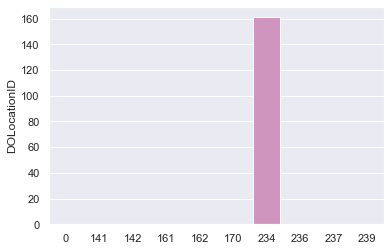

In [43]:


# Contamos las apariciones de los lugares mas concurridos
mostCommonSites = Counter(df['DOLocationID'])

# Mostramos los 10 primeros.
print(mostCommonSites.most_common(10))

aux = mostCommonSites.most_common(10)
most_important_places = []
for i in aux:
    most_important_places.append(i[0])

    
# for i, placeValue in enumerate(df['DOLocationID']):
#     if (not placeValue in most_important_places):
#         df.loc[i,'DOLocationID'] = 0

df['DOLocationID'] = np.where(df['DOLocationID'].isin(most_important_places), df['DOLocationID'], 0)

doLocation_feature = df['DOLocationID'].value_counts()

sns.barplot(x=doLocation_feature.index, y=doLocation_feature.values, data=df['DOLocationID'])
commonSites = Counter(df['DOLocationID'])
# Mostramos los 10 primeros.
print(commonSites.most_common(20))

In [45]:
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
count,1151160.000,1151160.000,1151160.000,1151160.000,1151160.000,1151160.000,1151160.000,1151160.000,1151160.000,1151160.000,1151160.000,1151160.000,1151160.000,1151160.000,1151160.000,1151160.000
mean,1.671,1.494,2.874,1.040,67.616,64.881,1.000,12.471,1.129,0.498,2.951,0.341,0.300,19.291,2.379,954.271
std,0.470,1.141,3.702,0.281,94.719,95.609,0.000,10.943,1.252,0.031,2.673,1.694,0.003,14.041,0.536,3614.685
min,1.000,0.000,0.010,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,1.000,1.000,1.000,1.000,0.000,0.000,1.000,6.500,0.000,0.500,1.750,0.000,0.300,11.800,2.500,400.000
50%,2.000,1.000,1.660,1.000,0.000,0.000,1.000,9.000,0.500,0.500,2.320,0.000,0.300,14.800,2.500,646.000
75%,2.000,2.000,2.920,1.000,162.000,161.000,1.000,13.500,2.500,0.500,3.260,0.000,0.300,20.380,2.500,1023.000
max,2.000,8.000,233.690,6.000,237.000,239.000,1.000,609.500,12.000,3.300,480.000,600.040,0.300,666.910,2.750,86386.000


<AxesSubplot:xlabel='duration', ylabel='trip_distance'>

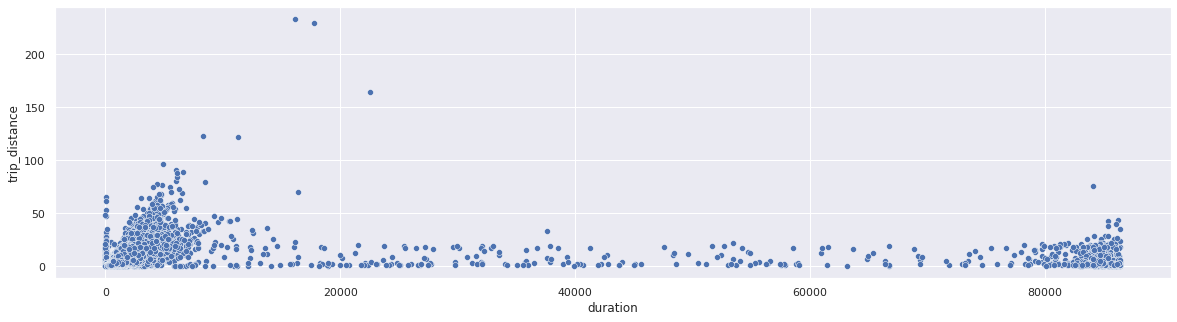

In [46]:
# Grafico de duracion de viaje vs distancia recorrida.
plt.figure(figsize=(20,5))
sns.scatterplot(x='duration', y='trip_distance', data=df)

<AxesSubplot:xlabel='trip_distance', ylabel='total_amount'>

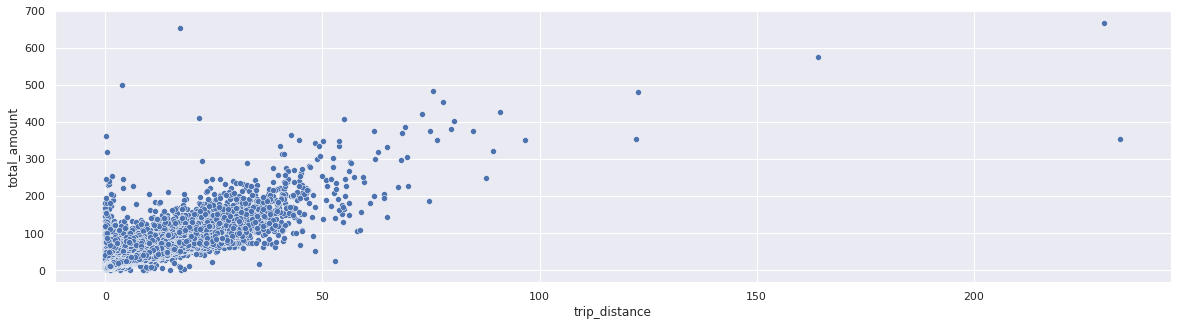

In [47]:
# Grafico de duracion de viaje vs total cobrado.
plt.figure(figsize=(20,5))
sns.scatterplot(x='trip_distance', y='total_amount', data=df)

<AxesSubplot:xlabel='trip_distance', ylabel='tip_amount'>

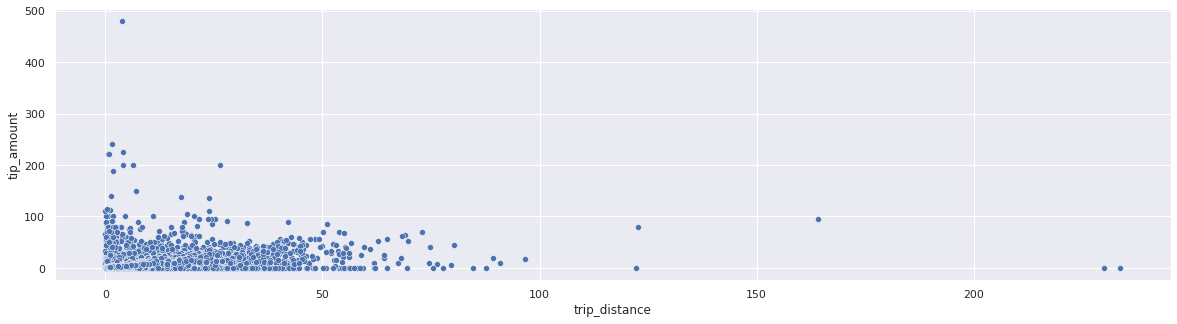

In [48]:
# Grafico de duracion de viaje vs propinas.
plt.figure(figsize=(20,5))
sns.scatterplot(x='trip_distance', y='tip_amount', data=df)

<AxesSubplot:xlabel='tip_amount', ylabel='total_amount'>

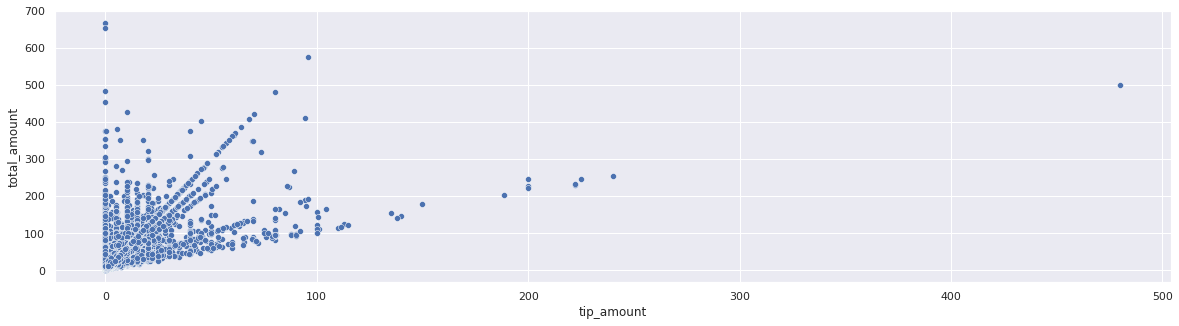

In [49]:
# Grafico de propinas vs total_cobrado.
plt.figure(figsize=(20,5))
sns.scatterplot(x='tip_amount', y='total_amount', data=df)

<AxesSubplot:xlabel='PULocationID', ylabel='total_amount'>

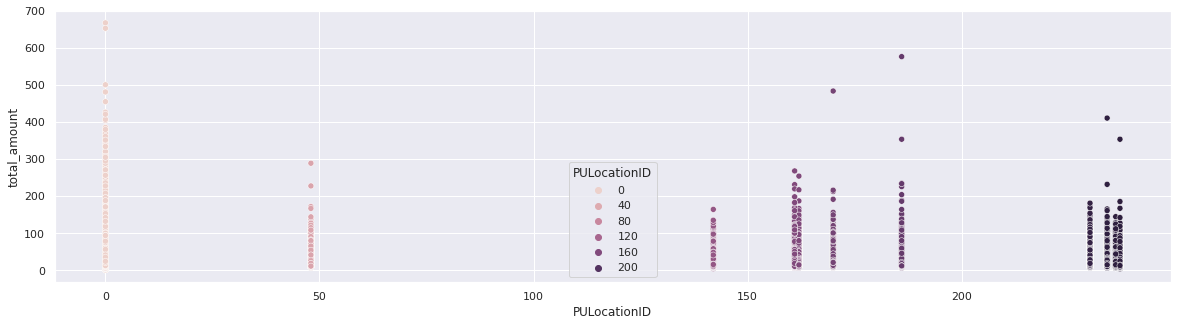

In [50]:
# Grafico de lugares donde se inicio el viaje con mayor valor cobrado.
plt.figure(figsize=(20,5))
sns.scatterplot(x='PULocationID', y='total_amount', hue= 'PULocationID',data=df)

<AxesSubplot:xlabel='DOLocationID', ylabel='total_amount'>

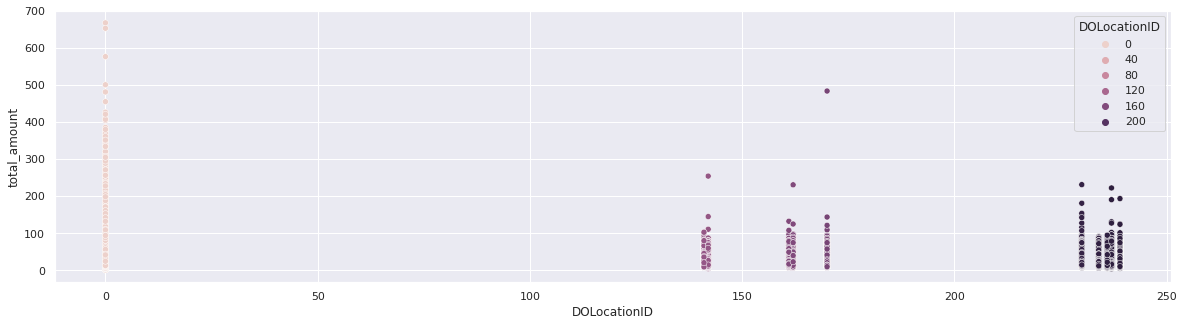

In [51]:
# Grafico de lugares donde se finalizo el viaje con mayor valor cobrado.
plt.figure(figsize=(20,5))
sns.scatterplot(x='DOLocationID', y='total_amount',hue= 'DOLocationID', data=df)

<AxesSubplot:xlabel='DOLocationID', ylabel='tip_amount'>

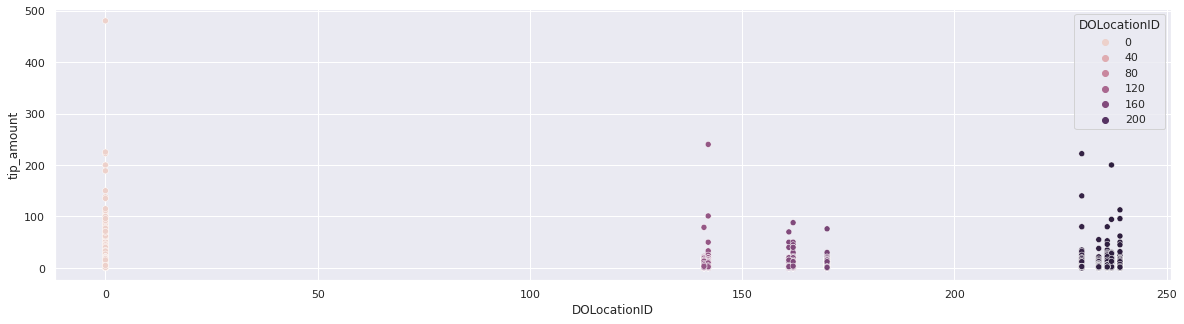

In [52]:
# Grafico de lugares donde se finalizo el viaje con mayor valor de propina.
plt.figure(figsize=(20,5))
sns.scatterplot(x='DOLocationID', y='tip_amount',hue= 'DOLocationID',  data=df)

### 2.3 Selección final de las features

En base al procesamiento anterior, seleccionamos los siguientes features del dataset:

In [71]:

feature_cols = [
  'passenger_count', 'trip_distance', 'fare_amount', 'extra', 
  'mta_tax', 'tip_amount', 'tolls_amount', 
  'improvement_surcharge', 'total_amount', 
  'congestion_surcharge', 'duration', 'PULocationID',
  'morning', 'afternoon', 'evening']
# target_col = ['DOLocationID']

X = df[feature_cols]
y = df['DOLocationID']

X.head()

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration,PULocationID,morning,afternoon,evening
0,1.000,3.910,16.000,0.000,0.500,3.860,0.000,0.300,23.160,2.500,1203.000,237,0,1,0
1,1.000,7.650,28.000,1.000,0.500,6.460,0.000,0.300,38.760,2.500,1874.000,0,0,1,0
2,3.000,2.810,13.000,0.000,0.500,3.000,0.000,0.300,19.300,2.500,1020.000,0,1,0,0
3,1.000,2.000,13.000,2.500,0.500,3.250,0.000,0.300,19.550,2.500,1126.000,0,1,0,0
4,0.000,1.700,7.000,3.000,0.500,1.300,0.000,0.300,12.100,2.500,353.000,234,0,0,1


#### Eliminacion de datos con baja varianza

In [73]:
# TODO
from statistics import variance
from sklearn.feature_selection import VarianceThreshold

constant_filter = VarianceThreshold(threshold=0.01)

#Fit and transforming on train data
data_constant = constant_filter.fit_transform(X)
print(X.shape)
print(data_constant.shape)

#Extracting all constant columns using get support function of our filter
constant_columns = [column for column in X.columns
                    if column not in X.columns[constant_filter.get_support()]]

#No. of constant columns
print(len(constant_columns))

#Constant columns names:
for column in constant_columns:
    print(column)
    
variance_X = X.drop(constant_columns,axis=1)
variance_X.shape

(1151160, 15)
(1151160, 13)
2
mta_tax
improvement_surcharge


(1151160, 13)

In [74]:
variance_X.head()

,passenger_count,trip_distance,fare_amount,extra,tip_amount,tolls_amount,total_amount,congestion_surcharge,duration,PULocationID,morning,afternoon,evening
0,1.000,3.910,16.000,0.000,3.860,0.000,23.160,2.500,1203.000,237,0,1,0
1,1.000,7.650,28.000,1.000,6.460,0.000,38.760,2.500,1874.000,0,0,1,0
2,3.000,2.810,13.000,0.000,3.000,0.000,19.300,2.500,1020.000,0,1,0,0
3,1.000,2.000,13.000,2.500,3.250,0.000,19.550,2.500,1126.000,0,1,0,0
4,0.000,1.700,7.000,3.000,1.300,0.000,12.100,2.500,353.000,234,0,0,1


#### Duracion de viaje vs Distancia recorrida.

#### Grafico de total cobrado vs distancia del viaje

#### Grafico de distancia recorrida vs propina dada

#### Selección de features con el coeficiente de Kendall

El coeficiente de Kendall permite analizar la correlación entre variables numéricas de entrada y una variable de salida categórica (DOLocationID). 
- Test de correlación de Kendall: 
    - Test no paramétrico, i.e. no asume ninguna distribución de los datos
    - $H_0$: Las variables son independientes, $H_1$: Las variables no son independientes.
    - Se basa en el estadístico $\tau = {\frac {2}{n(n-1)}}\sum _{i<j}{sgn}(x_{i}-x_{j}){sgn}(y_{i}-y_{j})$ 
    - Orden $n^2$, si hay muchos datos puede ser muy costoso.

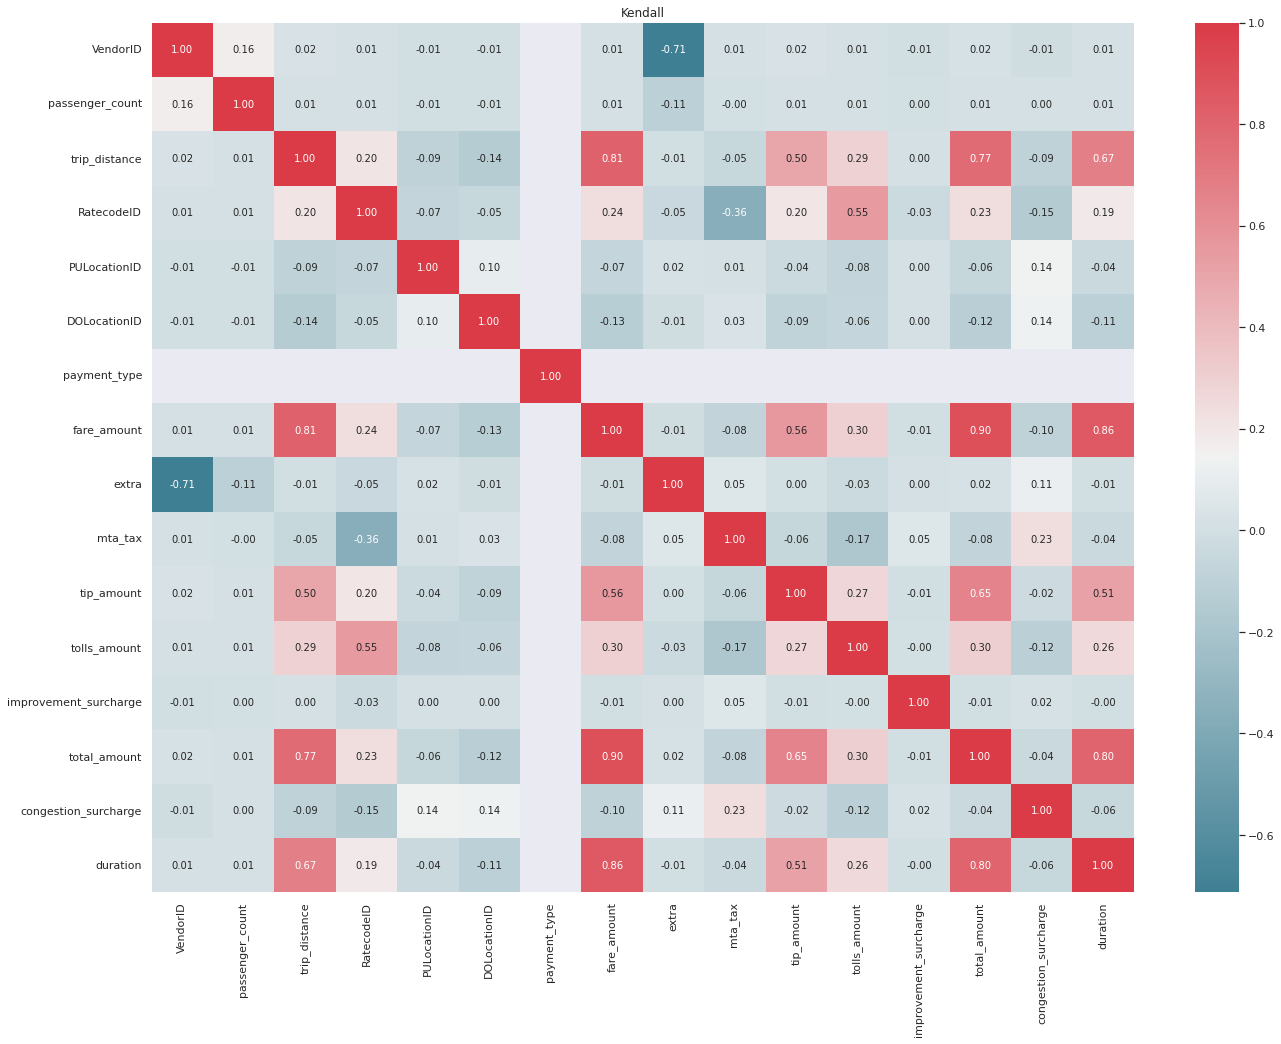

In [75]:
fig, axes = plt.subplots(1,1,figsize=(22,16))

tau = df.corr(method='kendall')
axes.set_title("Kendall")
sns.heatmap(tau, cmap=sns.diverging_palette(220,10,as_cmap=True),annot=True,fmt=".2f")
sns.set(font_scale=0.9)

__Conclusión__:  
Se detectan correlaciones fuertes (superior al 75%) entre los siguientes features:
fare_amount - trip_distance (0.81)
total_amount - trip_distance (0.77)
total_amount - fare_amount (0.90)
duration - fare_amount (0.86)
duration - total_amount (0.80)

Se concluye que podría llegar a seleccionarse entre total_amount y fare_amount en lugar de avanzar con ambas dada su alto grado de correlación

## 3.Entrenamiento de modelos 
### 3.1 Separación de datos


In [76]:
# Particionamos en train y test
train_ratio = 0.7
test_ratio = 0.3

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)


In [77]:
#imprimo tamaños de los dataset de train y test
print(f'train len={len(X_train)}')
print(f'test len={len(X_test)}')

train len=863370
test len=287790


### 3.2 Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
total_trees = 100 # number of trees
max_depth = 2

rf = RandomForestClassifier(n_estimators = total_trees, max_depth = max_depth, random_state=0)

In [68]:
rf.fit(X_train, y_train.values.reshape(-1))


RandomForestClassifier(max_depth=2, random_state=0)

In [62]:

# Utilizamos el método de predicción en los datos de prueba
y_rf_pred = rf.predict(X_test)

In [80]:
print(classification_report(y_test,y_rf_pred))
#print('Area bajo la curva ROC:',np.round(roc_auc_score(y_test,y_rf_pred),4))
# rf_precision, rf_recall, rf_threshold=precision_recall_curve(y_test, y_rf_pred)
# print('Area bajo la curva Precision-Recall:',np.round(auc(rf_recall,rf_precision),4))
# plot_confusion_matrix(rf, X_test, y_test,cmap='Blues')

/home/santiago/miniconda3/envs/automl/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.67      1.00      0.80    193240
         141       0.00      0.00      0.00      7919
         142       0.00      0.00      0.00      8116
         161       0.00      0.00      0.00     11137
         162       0.00      0.00      0.00      8867
         170       0.00      0.00      0.00      9229
         230       0.00      0.00      0.00      7609
         234       0.00      0.00      0.00      8223
         236       0.00      0.00      0.00     13489
         237       0.00      0.00      0.00     11826
         239       0.00      0.00      0.00      8135

    accuracy                           0.67    287790
   macro avg       0.06      0.09      0.07    287790
weighted avg       0.45      0.67      0.54    287790



<BarContainer object of 15 artists>

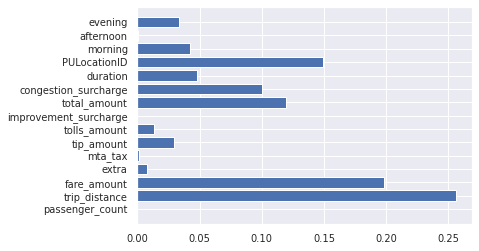

In [84]:
#grafico los features segun su importancia
plt.barh(X_train.columns, rf.feature_importances_)

### 3.3 Regresión logística

In [ ]:
def logistic_regression_report(X_train,X_test,y_train,y_test):
    
    scaler=StandardScaler()  
    
    X_train_sc=scaler.fit_transform(X_train) # Estandarizamos los datos     
    X_test_sc=scaler.transform(X_test)
        
    model=LogisticRegressionCV(scoring='f1')
    
    model.fit(X_train_sc,y_train)
    y_pred=model.predict(X_test_sc)
    y_proba=model.predict_proba(X_test_sc)
    
    print(classification_report(y_test,y_pred))    
    print('Area bajo la curva ROC:',np.round(roc_auc_score(y_test,y_proba[:,1]),4))    
    precision, recall,threshold=precision_recall_curve(y_test,y_proba[:,1])
    print('Area bajo la curva Precision-Recall:',np.round(auc(recall,precision),4))
    print(f'Precision:{precision}, Recall: {recall}:')
    plot_confusion_matrix(model,X_test_sc,y_test,cmap='Blues')

In [79]:
scaler = StandardScaler()  
X_train_sc = scaler.fit_transform(X_train) # Estandarizamos los datos     
X_test_sc = scaler.transform(X_test)

lr = LogisticRegression(random_state = 1, max_iter=300)
lr.fit(X_train_sc,y_train)
y_lr_pred = lr.predict(X_test_sc)
# lr_precision, lr_recall, lr_threshold=precision_recall_curve(y_test,y_lr_pred)

# lr_precision, lr_recall, lr_threshold

In [83]:
print(classification_report(y_test,y_lr_pred))


/home/santiago/miniconda3/envs/automl/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.67      1.00      0.80    193240
         141       0.00      0.00      0.00      7919
         142       0.00      0.00      0.00      8116
         161       0.02      0.00      0.00     11137
         162       0.00      0.00      0.00      8867
         170       0.00      0.00      0.00      9229
         230       0.00      0.00      0.00      7609
         234       0.00      0.00      0.00      8223
         236       0.00      0.00      0.00     13489
         237       0.00      0.00      0.00     11826
         239       0.00      0.00      0.00      8135

    accuracy                           0.67    287790
   macro avg       0.06      0.09      0.07    287790
weighted avg       0.45      0.67      0.54    287790



<BarContainer object of 15 artists>

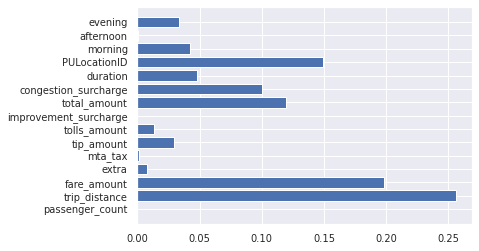

In [85]:
#grafico los features segun su importancia
plt.barh(X_train.columns, rf.feature_importances_)

## Automl


In [88]:
from pycaret.classification import *
from pycaret.datasets import get_data

In [89]:

df_automl = df[feature_cols]
df_automl['DOLocationID'] = df['DOLocationID']
clf1 = setup(df_automl, target = 'DOLocationID', log_experiment = True, experiment_name = 'tp_final', use_gpu=False, silent=True)

,Description,Value
0,session_id,1544
1,Target,DOLocationID
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(1151160, 16)"
5,Missing Values,False
6,Numeric Features,10
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


2022/08/17 23:27:50 INFO mlflow.tracking.fluent: Experiment with name 'tp_final' does not exist. Creating a new experiment.


In [90]:
# model training
best_model = compare_models() 

IntProgress(value=0, description='Processing: ', max=74)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,23:27:59
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Classifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.6712,0.0000,0.0909,0.4506,0.5392,-0.0000,-0.0004,0.3300
lr,Logistic Regression,0.6709,0.5951,0.0909,0.4513,0.5391,-0.0003,-0.0046,218.1290
knn,K Neighbors Classifier,0.6506,0.6003,0.1094,0.5022,0.5508,0.0539,0.0773,7.9670
svm,SVM - Linear Kernel,0.5251,0.0000,0.0999,0.4793,0.4608,0.0247,0.0262,34.1500
dt,Decision Tree Classifier,0.5009,0.5606,0.1520,0.5150,0.5078,0.0966,0.0967,2.3160
nb,Naive Bayes,0.1996,0.6406,0.1418,0.5910,0.2591,0.0604,0.0772,0.4660


/home/santiago/miniconda3/envs/automl/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/santiago/miniconda3/envs/automl/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/santiago/miniconda3/envs/automl/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed 

# TODO - Falta terminar

1. Aplicar filtrado Kendall para analizar las variables de entrada con respecto a la de salida
2. Analizar variables con poca varianza
3. Quedarse con las 10 Locations mas importantes de Pick Up y Drop Off y todas las otras meterlas en un id 0 (others)
4. Correr Random Forest y Linear regression. Obtener los feature importance.
5. Ejecutar pyCaret para ver en que concluye el automl